<a href="https://colab.research.google.com/github/karnarajrathod/star-tech-academy-code-/blob/main/Time_series_temperature_Shan_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## Importing necessary libraries..

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.. Lets Pre-process our data
    Let's read the data from the "GlobalTemperatures.csv" file, 
    which has a monthly Earth’s temperature and plot it on the 
    chart.

In [7]:
global_temp=pd.read_csv(r'/content/GlobalTemperatures.csv')

In [8]:
global_temp.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


### how to clean/prepare/pre-process data :
    a.. remove duplicate rows
    b.. remove irrelevant data.
    c.. Fix structural errors.
    d.. check missing values in data
    e.. check data-type of each feature is right or not..
    f.. deal with the outliers

In [9]:
global_temp.duplicated().sum()

### ie no duplicated observations we have !

0

In [10]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [11]:
### date-type of 'dt' must be 'Date-time' bcz it holds date-time values..

'''
in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

'''

'\nin date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,\nns is basicaly nano second..\nBoth are similar , it entirely how your numpy was compiled..\n\n'

In [12]:
global_temp['dt'][0]

'1750-01-01'

In [13]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [14]:
global_temp['dt'].dtype

dtype('<M8[ns]')

In [15]:
global_temp['dt'][0]

Timestamp('1750-01-01 00:00:00')

# 2.. Does Global Warming exists ?

In [16]:

## extracting year from the 'dt' feature..
global_temp['years']=global_temp['dt'].dt.year

In [17]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [18]:
## finding "avg_LandAverageTemperature" & "avg_LandAverageTemperatureUncertainty" for each of the year..

data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [19]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [20]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

    Maximum Uncertainty will be Avg temperature  +   deviation(Uncertainty)

    whereas minimum Uncertainty will be Avg temp -   deviation(Uncertainty)

    and this deviation is exactly your Uncertainty...

In [21]:

## so lets create 2 more features as 'Uncertainty_top' & 'Uncertainty_bottom'

data['Uncertainty_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [43]:
data.head(2)

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000


In [23]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],
      dtype='object')

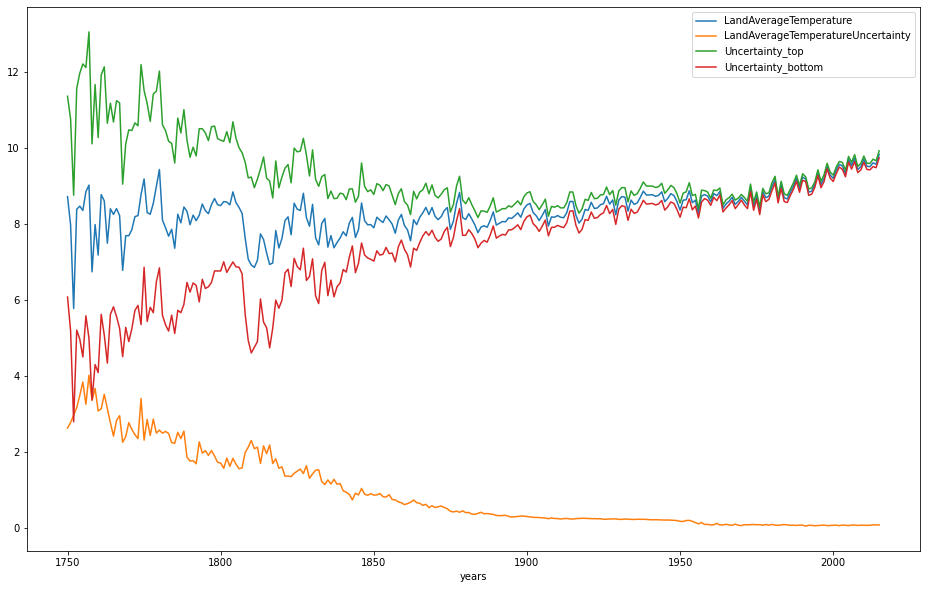

In [24]:
### pandas lineplot :

data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

    Conclusion ::  From the charts you can see, that there is global warming nowadays. 
        The average temperature of Earth surface has the highest value in 
        the last three centuries. The fastest temperature growth occurred 
        in the last 30 years! This worries me, I hope soon humanity will 
        fully switch to ecological sources of energy, that will reduce CO2. 
        If it’s will not happened, we will be in disaster. This charts also 
        have confidence intervals, which shows that measurement of temperatur
        e has become more accurate in the last few years.

# 3.. Analyse Average temperature in each season ?

In [25]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years'],
      dtype='object')

In [26]:
## extract 'month' from 'dt' feature.
global_temp['month']=global_temp['dt'].dt.month

In [27]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2


In [28]:
global_temp['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
## lets define a function to extract season from 'month'

def get_season(month):
    
    if month>=3 and month<=5:
        return 'spring'
    
    elif month>=6 and month<=8:
        return 'summer'
    
    elif month>=9 and month<=11:
        return 'autumn'
    
    else:
        return 'winter'

In [30]:
## applying a function on top of 'month' feature..

global_temp['season']=global_temp['month'].apply(get_season)

In [31]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years', 'month',
       'season'],
      dtype='object')

In [32]:
years=global_temp['years'].unique()

In [33]:
global_temp['season'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [34]:
## lets define 4 blank lists to store all the "season temp"  of "various years".

spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

for year in years:
    current_yr=global_temp[global_temp['years']==year]
    
    spring_temps.append(current_yr[current_yr['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season']=='winter']['LandAverageTemperature'].mean())
    

In [35]:
### lets make a blank dataframe ..

season=pd.DataFrame()

In [36]:
## assigning features in dataframe..

season['years']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [37]:
season

,years,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...,...
261,2011,9.190000,14.954667,10.026000,3.893333
262,2012,9.429667,14.762667,10.208000,3.629000
263,2013,9.166667,14.771000,10.278000,4.210333
264,2014,9.516333,14.694333,10.044667,4.027333


In [38]:
##data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
 ##      'Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

In [39]:
season.columns

Index(['years', 'spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps'],
      dtype='object')

In [40]:
season[['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps']]

,spring_temps,summer_temps,autumn_temps,winter_temps
0,8.563000,14.518333,8.890000,2.963000
1,6.735000,14.116000,10.673000,1.729000
2,7.035500,NaN,7.587000,2.717000
3,8.627333,14.608333,9.212333,1.104333
4,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...
261,9.190000,14.954667,10.026000,3.893333
262,9.429667,14.762667,10.208000,3.629000
263,9.166667,14.771000,10.278000,4.210333
264,9.516333,14.694333,10.044667,4.027333


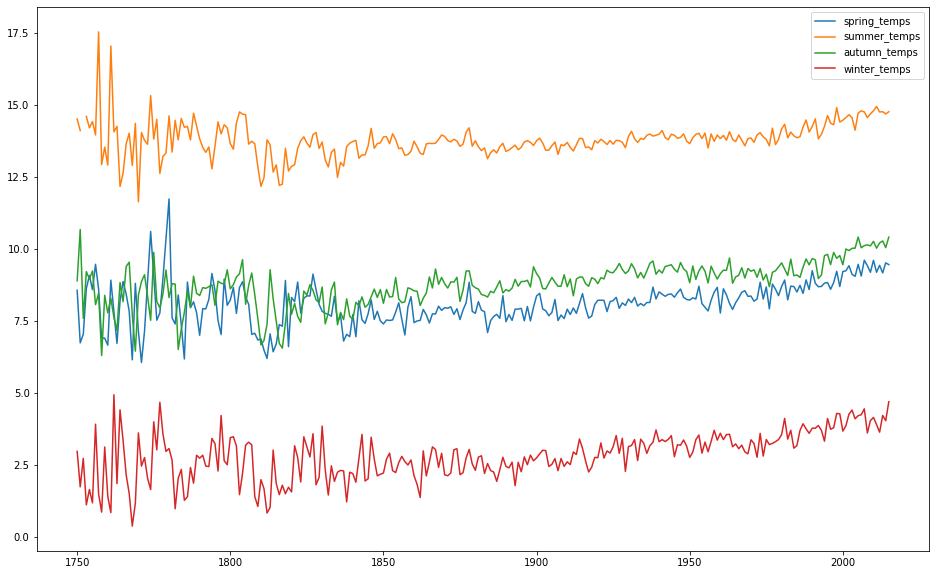

In [41]:
plt.figure(figsize=(16,10))
plt.plot(season['years'],season[['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps']])

plt.legend(['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps'])

    Is it getting warmer? Yes, it is.

# 4.. how to prepare your data for Time series Modelling..
    Prepare your data for Modelling.. (lets do sampling 
        of data & then pre-processing of data )

In [42]:
### lets read 'GlobalLandTemperaturesByCity.csv'

cities=pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalLandTemperaturesByCity.csv')

FileNotFoundError: ignored

In [ ]:
cities.shape

#### how to do sampling in data..
    1.. Random sampling
    2.. we say pick first 1M or last 1M points..
    3.. we say we pick data for Top economies.. (Russia ,USA ,
             UK ,India ,France etc.. )
             
         or pick data for some cities of USA , eg 
         ['New York','Los Angeles','San Francisco' ,'Mumbai' ,'Delhi']

In [ ]:
## finding unique countries in 'country' feature..

cities['Country'].unique()

In [ ]:
## creating separate datafrme for 'United States' only..

usa=cities[cities['Country']=='United States']

In [ ]:
usa.columns

In [ ]:
## unique cities in 'usa'..

usa['City'].unique()

In [ ]:
## considering data of ['New York','Los Angeles','San Francisco'] in my usa dataframe..

usa_cities=['New York','Los Angeles','San Francisco']

In [ ]:
data2=usa[usa['City'].isin(usa_cities)]

In [ ]:
data2.shape

In [ ]:
data2.head(3)

In [ ]:
data2=data2[['dt','AverageTemperature']]

In [ ]:
data2.head(2)

In [ ]:
## assigning your own column name..

data2.columns=['Date','Temp']

In [ ]:
data2

In [ ]:
data2.dtypes

In [ ]:
## converting data-type of 'Date' feature into date-time ..

data2['Date']=pd.to_datetime(data2['Date'])

In [ ]:
data2.dtypes

In [ ]:
## total missing values in each of the feature..

data2.isnull().sum()

In [ ]:
## dropping the missing values..

data2.dropna(inplace=True)

In [ ]:
data2.head(3)

    note:   for Machine Learning,feature is a columns & we have 
               by-default index as from 0 but for our time series 
               Problem,we have date column our as row-index

In [ ]:
data2.set_index('Date',inplace=True)

In [ ]:
data2.head(4)

# 5.. How to find whether data has Seasonality factor or not..
      we will try to convert our seasonal data into stationary bcz Time SEries algos works phenomenal with stationary data..

    lets understand what is seasoanlity ,stationary & couple of Time series Terms..

    seasonality ->> When mean & variance is not constant throughout the data ,
                    ie data has a trend here..
                    
    stationary data ->>  so data that has no trend ie that has constant 
                       mean & std dev throughout data..
                       
    if not stationary then we have to make it stationary using various manipulations..


    Seasonality is opposite of stationary ,ie 
        A time series with a clear seasonal component is referred to as non-stationary...
        
        ie the goal is we have to convert seasonal data into stationary data..
        
        
        
        a)Visualisation approach
    
    (seasonality is all about suppose in each yr in christmas sales goes up) and then down ,
       ie this is a cycle that repeats over time, such as monthly or yearly. 
       
       There are many types of seasonality; 
       for example:

    Time of Day.
    Daily.
    Weekly.
    Monthly.
    Yearly.
    Once seasonality is identified, it can be removed

    The model of seasonality can be removed from the time series. 
    This process is called Seasonal Adjustment, or Deseasonalizing.
    A time series where the seasonal component has been removed is called seasonal stationary.
    A time series with a clear seasonal component is referred to as non-stationary.
https://machinelearningmastery.com/time-series-seasonality-with-python/

        

In [ ]:
###  i'm going to create a pivot table to plot the monthly temperatures through the years
## so I need 'year' & 'month' feature..

data2['year']=data2.index.year

In [ ]:
data2['month']=data2.index.month

In [ ]:
data2.head(3)

In [ ]:
## creating a pivot table :

pivot=data2.pivot_table(values='Temp',index='month',columns='year')

In [ ]:
pivot

In [ ]:
## if we want to plot with respect to time or index of dataframe ,  we can use pivot.plot() function of pandas ..


pivot.plot(figsize=(20,8))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

    looking this graph,we can say this data is seasonal
        The series clearly has some seasonality, the higher temperatures 
        are around b/w June & August and the lower are between December & Feb
        so thats basically a observation that u can drawn and represent to ur client..


# 6.. How to find whether data is stationary or not..

### ways to find that...
    a.. using data visualisation (lineplot to find out 
                               whats a trend of data)
                               
    b.. Evaluating the descriptive statistics ( ie compute
                 mean & variance of various chunks of data )
https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/

    c.. using statistical Tests (AD-Fuller , KPSS Test )

In [ ]:
### checking whether data is stationary or not..

data2['Temp'].plot(figsize=(20,12))

In [ ]:
'''
It seems that data is seasonal in nature.. The spread of the data indicates that there is a significant variation in the data. 
To flatten the growing variance, we need to transform the data.

A recurring pattern with a defined and predictable regularity dependent on the time of year, week, or day 
is referred to as seasonality.



'''

#### b.. using statistical Tests
https://analyticsindiamag.com/how-to-make-a-time-series-stationary/


    >> Ad-fuller Test
    >> Kwiatkowski Phillips Schmidt Shin (KPSS) test:

In [ ]:
### Testing For Stationarity using Augmented Dickey-Fuller test..

from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data2['Temp'])

In [ ]:
'''
adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','critical values']

most imp is p-value
p-value concept is almost similar to Hypothesis testing,
Hypothesis Testing have 2 Hypothesis(Alternate & Null Hypothesis)

Null hypo says Data is not Stationery
whereas Alternate hypo says data is stationery

lags are those which are our previous Data

'''

In [ ]:
#if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is 
# true,ie data is stationery

In [ ]:
#Ho: ie null hypoIt is non stationary
#H1: ie Alternate Hypo ,It is stationary
#zip basically combines result,labels

In [ ]:
def adfuller_test(data):
    result=adfuller(data)
    
    labels=['ADF Test statistics','p-value','lags_used','nobs']
    
    for value,label in zip(result,labels):
        print(label + ' : ' + str(value))
    if result[1] <=0.05:
        print('reject the Ho ,data is stationary')
    else:
        print('fail to reject the Ho ,data is not stationary')
    

In [ ]:
adfuller_test(data2['Temp'])

# 7.. How to make your data stationary ..

#### Now data is not non-stationary ,ie we have to make it stationary..
    using log , sq root , cube root , differencing etc...

In [ ]:
##data2['Temp'].head(10)

In [ ]:
##data2['Temp'].shift(3).head(10)

In [ ]:
data2['first_temp_diff']=data2['Temp'] - data2['Temp'].shift(12)

In [ ]:
'''
why taken shift(12) , bcz basically year has 12 month cycle , ie in order to remove seasonal component..

In previous diagram of pivot table , we have figured out that we have yearly seasonality.. , 
so lets use shift(12) to remove seasonality 

'''

In [ ]:
data2.head(13)

In [ ]:
## Again perform Aug.dickey fuller test on df['first_diff_temp']

adfuller_test(data2['first_temp_diff'].dropna())

In [ ]:
''
now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
ie data is stationery

Note : if p-value is almost 0, then we can say , we have a wonderful stationary graph

'''

In [ ]:
data2['first_temp_diff'].plot(figsize=(20,6))

# 8.. Lets build Time Series model..
    Lets Build a basic moving Avg model  

    types of models in Time-Series :
         1.Base line model
         2.Exponential model
         3.AR model
         4.MA model
         5.ARIMA model
         6.SARIMA model(Seasonal ARIMA)

In [ ]:
df=data2[['first_temp_diff']]

In [ ]:
df.dropna(inplace=True)

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df.head(10)

In [ ]:
### Smoothening your series using moving average
## Rolling is just like a window that you are going to consider or I can say its a window that we have considered for Moving average,
## lets say 5 is the window size or 5 is the business period


df['Predictions']=df['first_temp_diff'].rolling(window=5).mean()

In [ ]:
df.head(2)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(3)

In [ ]:
df.columns=['actual_temp','forecast_temp']

In [ ]:
df.head(3)

In [ ]:
### check accuracy of your model using RMSE..

from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(df['actual_temp'],df['forecast_temp']))

## why np.sqrt, bcz mean_squared_error gives square of error and then by calling np.sqrt we get actual error

# 9.. Lets Build ARIMA Model..

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [ ]:
df.head(3)

In [ ]:
plot_acf(df['actual_temp'])
plt.show()
## q-3

In [ ]:
plot_pacf(df['actual_temp'])
plt.show()
## p-2

In [ ]:
df.head(3)

In [ ]:
df=df[['actual_temp']]

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
training_data=df[0:6000]
testing_data=df[6000:]

### create test data that is basically unseen to our model or which is basically is used for evalaution

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
### arima= ARIMA(training_data,order=(p,d,q))

arima=ARIMA(training_data,order=(2,1,3))

In [ ]:
model=arima.fit()

In [ ]:
## doing predictions..

pred=model.forecast(steps=len(testing_data))[0]

In [ ]:
pred

In [ ]:
len(pred)

In [ ]:
len(testing_data)

In [ ]:
np.sqrt(mean_squared_error(testing_data,pred))

In [ ]:
'''
now u will see it is better than MA model that we have created having Error as (2.4 degree centigrade) 
has decreased to 1.5 which shows that arima model is much more good in such sceanario rather than Baseline 

'''

# 10.. Lets do model Tuning or Hyperparameter Tuning..

In [ ]:
#### now define hyper-para=meters 

p_values=range(0,4)
d_values=range(0,3)
q_values=range(0,4)


In [ ]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair, 


for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            
            train=df[0:6000]
            test=df[6000:]
            
            predictions=[]
            
            ### now we have train & test data that we can pass to our algorithm
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    
                    ## Role of disp(displacement) is to control the frequency of the output during the iterations. 
                    
                    model=arima.fit(disp=0)
                    pred_y=model.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))

                except:
                    continue
                